<a href="https://colab.research.google.com/github/azizghozi25/Model-SEIR-untuk-Covid19/blob/main/Model_SEIR_untuk_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pemodelan SEIR untuk Covid-19


"All models are wrong, but some are useful." 

George E. Box

**Disclaimer!**

- Pemodelan ini hanya untuk pembelajaran bagaimana menerapkan bahasa python pada pemodelan matematika.

- Analisa Kestabilan model diperlukan setiap kali melakukan pemodelan. Namun pada pelatihan ini tidak dilakukan hal tersebut. Analisa kestabilan model dapat dipelajari pada Mata Kuliah lainnya. 


**So Let's Play with Models!**




Studi Kasus Provinsi Lampung

#Flowchart Model Penyebaran Virus Covid-19 SEIR
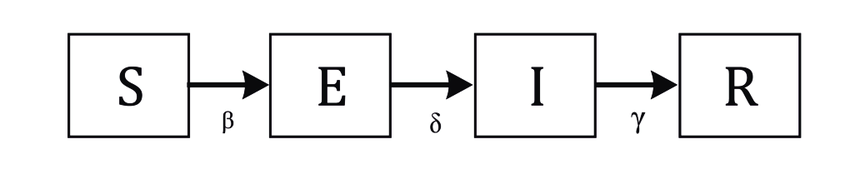

S : Jumlah orang yang rentan terinfeksi (Susceptible)

E : Jumlah orang yang telah tertular/terinfeksi oleh virus (Exposed)

I  : jumlah orang terinfeksi yang dapat menularkan pada orang lain (Infective)

R : Jumlah orang yang telah selesai terinfeksi (Removed)

#Persamaan Diferensial Model SEIR

(sumber : Pemodelan Evolusi Pandemi Covid-19 di kota pontianak, Joko Sampurno, 2020.) 

$\dfrac{dS}{dt} = -β(IS)$       

$\dfrac{dE}{dt} = β(IS) - δ E$

$\dfrac{dI}{dt} = δ E - γI$

$\dfrac{dR}{dt} = γI$

dengan,



> $β = \dfrac{R_t}{T_{inf}};$

$β:$koefisien penularan virus

$R_t:$Laju penularan wabah (Reproduction Rate) pada waktu t

$T_{inf}:$Waktu penularan (durasi semenjak pasien muncul simtom atau mulai menularkan hingga
diisolasi) 


>  $δ = \dfrac{1}{T_{inc}}; $

$δ:$Koefisien lama inkubasi virus

$T_{inc}:$Waktu inkubasi virus (dihitung dari pertama kali seseorang terinfeksi hingga menimbulkan
simtom/gejala dan atau menularkannya ke orang lain)


> $γ= \dfrac{1}{T_{inf}}$

$γ:$Koefisien lama seorang pasien sembuh, mempunyai imun atau paling buruk tidak bisa survive







  







#Setting Parameter

$S_0= 9.032.395$, Jumlah penduduk provinsi Lampung tahun 2019 (Disdukcakpil Bandar Lampung 2019)

$T_{inf}=2,9 $ hari (Kucharski dkk.,
2020)

$T_{inc}=5,2 $ hari (WHO, 2020)



#Metode Beda Hingga 

**1. Susceptible**

$\dfrac{ΔS}{Δt} = \dfrac{S(t) -S(t-Δt)
}{Δt}= -β(I(t-Δt)S(t-Δt))$


> $S(t)=S(t-Δt) - Δtβ(I(t-Δt)S(t-Δt))$






**2. Exposed**

$\dfrac{ΔE}{Δt} = \dfrac{E(t) -E(t-Δt)}{Δt}= β(I(t-Δt)S(t-Δt) -δE(t-Δt))$




> $E(t)=E(t-Δt) + Δt(β(I(t-Δt)S(t-Δt)-δ E(t-Δt))$

**3. Infected**

$\dfrac{ΔI}{Δt} = \dfrac{I(t) -I(t-Δt)}{Δt}= δ E(t-Δt) - γI(t-Δt)$

> $I(t)=I(t-Δt) + Δt(δ E(t-Δt) - γI(t-Δt))$

**4. Removed**

$\dfrac{ΔR}{Δt} = \dfrac{R(t) -R(t-Δt)}{Δt}= γI(t-Δt)$

> $R(t)=R(t-Δt) + Δt(γI(t-Δt))$



In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

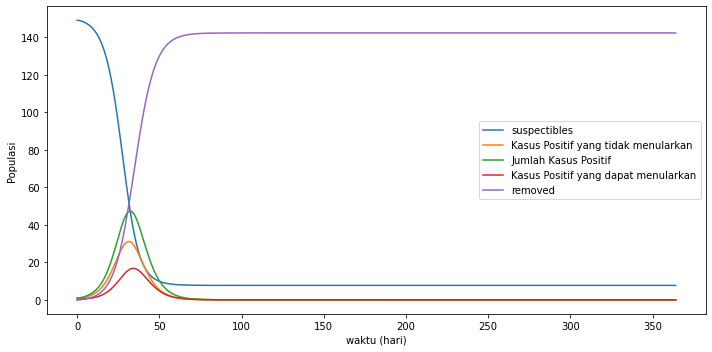

In [28]:
#panjang simulasi, langkah waktu, Jumlah poppulasi
n = 365 ;dt = 1 ;N = 150

#array zero 
S = np.zeros(n)
E = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)

#list hari sebanyak n
t = np.arange(0,n,dt) 

#inisialisasi parameter
T_inc  = 5.2            #waktu inkubasi virus 
T_inf  = 2.9            #waktu yang dibutuhkan seorang yang terinfeksi untuk pulih
R0     = 3              #basic reproduction number    
delta  = 1/T_inc        #koefisien inkubasi virus dalam satu hari
gamma  = 1/T_inf        #koefisien removed dalam satu hari
beta   = R0/T_inf       #koefisien penularan virus

E[0] = 1                      #Populasi individu yang terinfeksi tapi tidak menginfeksi yang lain 
I[0] = 0                      #Populasi individu terinfeksi dan menginfeksi orang lain
R[0] = 0                      #Populasi individu yang telah sembuh
S[0] = N-E[0]-I[0]-R[0]       #Populasi individu yang rentan terhadap penyakit

#metode numerik beda hingga 
for i in range (len(t)-1):
  S[i+1] = S[i] - dt*beta*(S[i]*I[i])/N
  E[i+1] = E[i] + dt*(beta*(S[i]*I[i])/N - delta*E[i])
  I[i+1] = I[i] + dt*(delta*E[i] - gamma*I[i])
  R[i+1] = R[i] + dt*(gamma*I[i])

#membuat Data Frame
data = {
        "Hari": t, "S"   : S, "E"   : E, "I"   : I, "R"   : R, "N"   : S+E+I+R
       }
tabel = pd.DataFrame(data)

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(S,label='suspectibles')
ax.plot(E,label='Kasus Positif yang tidak menularkan')
ax.plot(E+I,label='Jumlah Kasus Positif')
ax.plot(I,label='Kasus Positif yang dapat menularkan')
ax.plot(R,label='removed')
ax.set(xlabel = "waktu (hari)",
       ylabel = "Populasi")
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
tabel.set_index('Hari')

,S,E,I,R,N
Hari,,,,,
0,149.000000,1.000000e+00,0.000000e+00,0.000000,150.0
1,149.000000,8.076923e-01,1.923077e-01,0.000000,150.0
2,148.802387,8.499796e-01,2.813201e-01,0.066313,150.0
3,148.513690,9.752193e-01,3.477708e-01,0.163320,150.0
4,148.157492,1.143875e+00,4.153920e-01,0.283241,150.0
...,...,...,...,...,...
360,7.695269,1.408723e-20,1.335602e-20,142.304731,150.0
361,7.695269,1.208696e-20,1.145958e-20,142.304731,150.0
362,7.695269,1.037072e-20,9.832417e-21,142.304731,150.0


Asumsi lain:


- Persentase kasus kematian akibat terinfeksi covid-19 3.4% (WHO, 2020)



In [30]:
import ipywidgets as widgets
from ipywidgets import interact
@widgets.interact(PM = widgets.FloatSlider(value=3.4,min=0,max=100,step=0.1))
def SEIR(PM):
  M  = R*PM/100       #subopulasi yang meninggal karena covid dari populasi Removed (R) 
  FR = R*(1-PM/100)   #subopulasi yang Full Recovered karena covid dari populasi Removed (R) 

  # plot the data
  plt.figure(figsize=(8,5))

  plt.subplot(2,1,1)
  plt.plot(t,S, color='blue', lw=3, label='Susceptible')
  plt.plot(t,R, color='red',  lw=3, label='Removed')
  plt.ylabel('Populasi')
  plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t,I, color='orange', lw=2, label='Infective')
  plt.plot(t,E, color='purple', lw=2, label='Exposed')
  plt.plot(t,M, lw=2, label='Death')
  plt.plot(t,FR,':r', lw=2, label='Full Recovered')
  plt.xlabel('Time (days)')
  plt.ylabel('Populasi')
  plt.legend()

  plt.tight_layout()
  return plt.show()

interactive(children=(FloatSlider(value=3.4, description='PM'), Output()), _dom_classes=('widget-interact',))

#Penyelesaian PD dengan library scipy, odeint

ODE = Ordinary Differensial Equation (Persamaan Diferensial Biasa)


In [31]:
from scipy.integrate import odeint

#N = 9032395 # Jumlah Populasi

T_inc  = 5.2           #waktu inkubasi virus 
T_inf  = 2.9           #waktu yang dibutuhkan seorang yang terinfeksi untuk pulih
R0     = 3                  
delta  = 1/T_inc       #koefisien inkubasi virus dalam satu hari
gamma  = 1/T_inf       #koefisien recover dalam satu hari
beta   = R0/T_inf      #koefisien penularan virus 

Fungsi persamaan diferensial SEIR 

In [32]:
def covid(x, t, u, N, beta, gamma, delta):
    s,e,i,r = x
    dx = np.zeros(4)     
    dx[0] = -(1-u)*beta * s * i/N
    dx[1] = (1-u)*beta * s * i/N - delta * e
    dx[2] = delta * e - gamma * i
    dx[3] = gamma*i
    return dx



$u$ sebagai parameter social distancing $(0-1)$

$0$   : no social distancing

$0.1$ : masks

$0.2$ : masks and hybrid classes

$0.3$ : masks, hybrid, and online classes

dst

In [33]:
import ipywidgets as widgets
from ipywidgets import interact
@widgets.interact(u = widgets.FloatSlider(value=0.5,min=0,max=1, step=0.01),
                  N = widgets.FloatSlider(value=5000000,min=4,max=10000000, step=1))
def seir(u ,N):
    e0 = 1    ; i0 = 1
    r0 = 0    ;s0 = N - e0 - i0 - r0
    x0 = [s0,e0,i0,r0]
    
    n =365; dt=1
    t = np.arange(0, n, dt)
    x = odeint(covid, x0, t, args=(u, N, beta, gamma, delta))
    s = x[:,0]; e = x[:,1]; i = x[:,2]; r = x[:,3]

    # plot the data
    plt.figure()

    plt.subplot(2,1,1)
    plt.title('Social Distancing = '+str(u*100)+'%')
    plt.plot(t,s, color='blue', label='Susceptible')
    plt.plot(t,r, color='red', label='Recovered')
    plt.ylabel('Population')
    plt.legend()
    plt.tight_layout()

    plt.subplot(2,1,2)
    plt.plot(t,i, color='orange', label='Infective')
    plt.plot(t,e, color='purple', label='Exposed')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.legend()

    return plt.show()

interactive(children=(FloatSlider(value=0.5, description='u', max=1.0, step=0.01), FloatSlider(value=5000000.0…

More Complex?

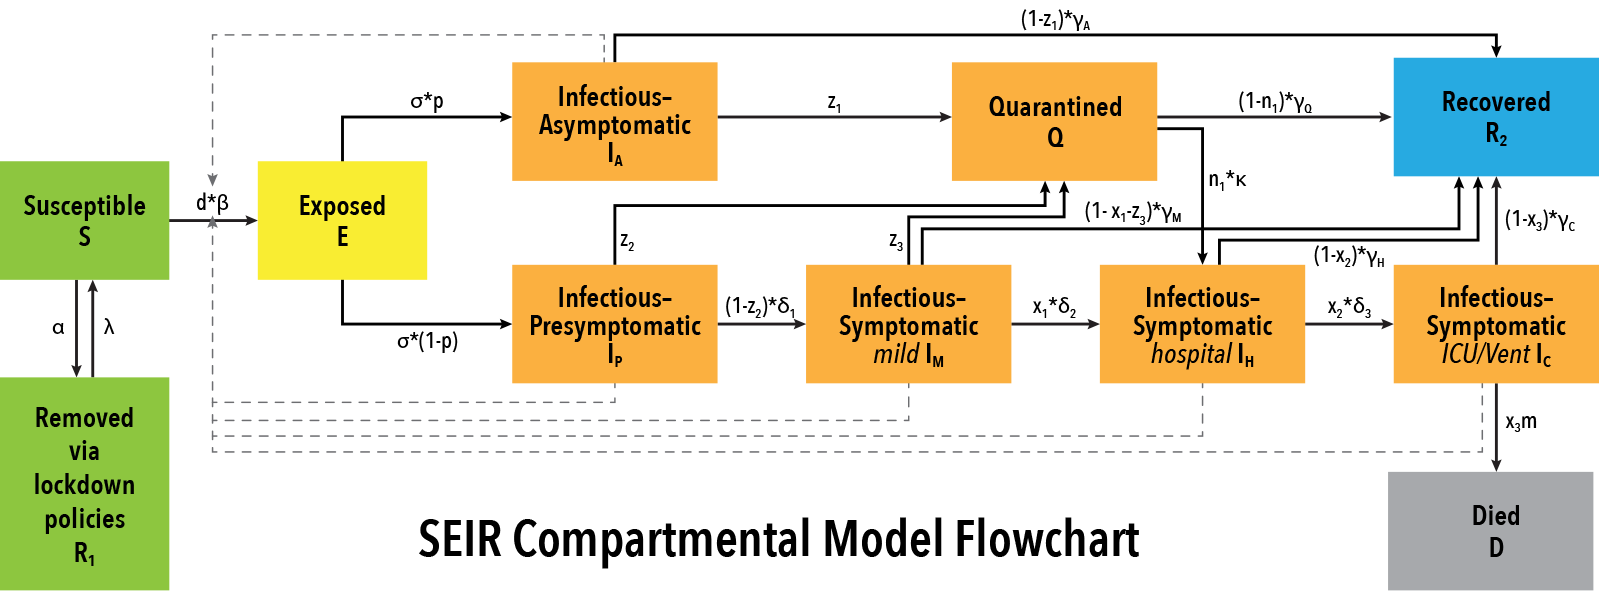

Kompartemen

- Individu yang rentan ($S$)

- Individu yang mendapat kebijakan lockdown ($R_1$)

- Individu yang terpapar yang telah terinfeksi tetapi belum menular ($E$)

- Individu menular yang asimtomatik / tanpa gejala($I_A$)

- Individu menular yang prematika ($I_P$)

- Individu menular yang memiliki gejala ringan ($I_M$)

- Individu menular yang memiliki gejala parah dan dirawat di rumah sakit ($I_H$)

- Individu menular yang dirawat di rumah sakit dan berada dalam kondisi kritis yang membutuhkan ICU dan / atau ventilator ($I_C$)

- Individu yang meninggal karena penyakit COVID-19 ($D$)

- Individu yang sembuh dari penyakit COVID-19 ($R_2$)

- Individu yang dikarantina ($Q$)

Asumsi

- tidak ada kelahiran dan kematian selain karena Covid-19 

#Persamaan diferesial model SEIR

(Sumber : [https://seircast.org/methodology.html](https://))

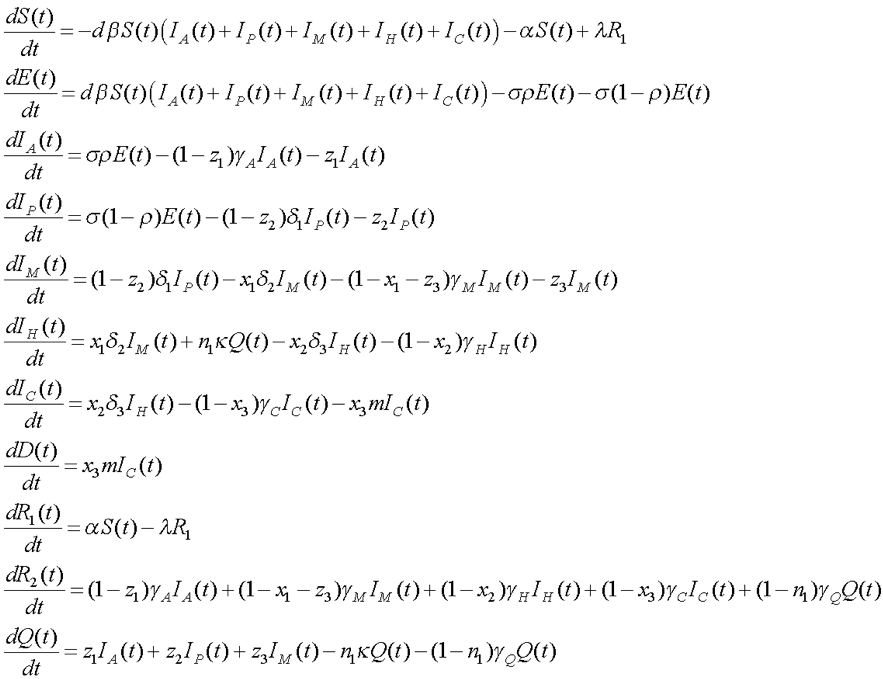

Buat Fungsi untuk persmaan diferensial yang diberikan

In [34]:
def kopit(x, t, L, alpha, beta, lamda, sigma, rho, m, n1, kappa, d,
          gamma_a, gamma_m, gamma_h, gamma_c, gamma_q, 
          delta_1, delta_2, delta_3, 
          x1, x2, x3, 
          z1, z2, z3):
    S, E, I_a, I_p, I_m, I_h, I_c, D, R_1, R_2, Q = x
    dx = np.zeros(11)
    dx[0]  = -d*beta*S*(I_a + I_p + I_m + I_h + I_c)/N - alpha*S + lamda*R_1
    dx[1]  = d*beta*S*(I_a + I_p + I_m + I_h + I_c)/N - sigma*rho*E - sigma*(1-rho)*E
    dx[2]  = sigma*rho*E - (1-z1)*gamma_a*I_a - z1*I_a
    dx[3]  = sigma*(1-rho)*E - (1-z2)*delta_1*I_p - z2*I_p
    dx[4]  = (1-z2)*delta_1*I_p - x1*delta_2*I_m - (1-x1-z3)*gamma_m*I_m - z3*I_m
    dx[5]  = x1*delta_2*I_m + n1*kappa*Q - x2*delta_3*I_h - (1-x2)*gamma_h*I_h
    dx[6]  = x2*delta_3*I_h - (1-x3)*gamma_c*I_c - x3*m*I_c 
    dx[7]  = x3*m*I_c
    dx[8]  = alpha*S - lamda*R_1
    dx[9]  = (1-z1)*gamma_a*I_a + (1-x1-z3)*gamma_m*I_m + (1-x2)*gamma_h*I_h + (1-x3)*gamma_c*I_c +(1-n1)*gamma_q*Q
    dx[10] = z1*I_a  + z2*I_p + z3*I_m - n1*kappa*Q - (1-n1)*gamma_q*Q
    return dx

Inisialisasi konstanta sesuaikan dengan sumber. 

[https://seircast.org/methodology.html](https://)

In [35]:
#konstanta yang dibutuhkan
N         = 9032395
L         = 5
alpha     = 0
lamda     = alpha/L
beta      = 1.5   #tingkat penyebaran virus
sigma     = 0.5   #tingkat perubahan dari Exposed ke Infected
rho       = 0.50  #Proporsi orang yang terekspos ke tanpa gejala
m         = 0.08  #tingkat kematian dari Kompartemen ICU
n1        = 0.1   #proporsi kompartemen Quarantine yang berkembang ke kompartemen Hospitalized selajutnya
kappa     = 0.33  #tingkat pergerakan dari Quarantine ke Hospitalize
d         = 0.42  #pengurangan penularan akibat social distancing 
gamma     = [0.125, 0.125, 0.125, 0.125, 0.125] #tingkat pemulihan
gamma_a, gamma_m, gamma_h, gamma_c, gamma_q = gamma
delta     = [0.5, 0.06, 0.09]  #tingkat perubahan dari satu kompartemen ke kompartemen berikutnya
delta_1, delta_2, delta_3 = delta
X         = [0.25, 0.25, 0.2]  #proporsi kompartemen yang berkembang ke kompartemen Infected selajutnya
x1, x2, x3= X 
Z         = [0.25, 0.25, 0.25] #proporsi kompartemen yang berkembang ke kompartemen Quarantine 
z1, z2, z3 = Z

konstanta = (L, alpha, beta, lamda, sigma, rho, m, n1, kappa, d,
             gamma_a, gamma_m, gamma_h, gamma_c, gamma_q, 
             delta_1, delta_2, delta_3, 
             x1, x2, x3, 
             z1, z2, z3)

#subpopulasi awal
E0, I_a0, I_p0, I_m0, I_h0, I_c0, D0, R_1_0, R_2_0, Q0 = 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 
S0 = N - E0 

#buat seluruh subpopulasi dalam sebuah list
x0 = [S0, E0, I_a0, I_p0, I_m0, I_h0, I_c0, D0, R_1_0, R_2_0, Q0]

In [36]:
def SEIRcov(d):   
    n = 500; dt=1
    t = np.arange(0, n, dt)

    #Proses penyelesaian ODE
    x = odeint(kopit, x0, t, 
               args = (L, alpha, beta, lamda, sigma, rho, m, n1, kappa, d,
                      gamma_a, gamma_m, gamma_h, gamma_c, gamma_q, 
                      delta_1, delta_2, delta_3, 
                      x1, x2, x3, 
                      z1, z2, z3))
    #Hasil ODE
    S = x[:,0]; E = x[:,1]
    I_a = x[:,2]; I_p = x[:,3]; I_m= x[:,4]; I_h = x[:,5]; I_c = x[:,6]; 
    D = x[:,7] 
    R_1 = x[:,8]; R_2= x[:,9] 
    Q = x[:,10]
 
    # plot the data
    plt.figure(figsize=(8,6))

    plt.subplot(2,1,1)
    plt.title('Social Distancing = {}'.format(str((1-d)*100))+'%')
    plt.plot(t,S, label='Susceptible')
    plt.plot(t,R_2, label='Recovered')
    #plt.plot(t,R_1, label='Lockdown')
    plt.ylabel('Population')
    plt.legend()
    plt.tight_layout()

    plt.subplot(2,1,2)
    plt.plot(t,E, label='Exposed but not infecting')
    plt.plot(t,I_a, label='Asymptomatic')
    plt.plot(t,I_p, label='Presymptomatic')
    plt.plot(t,I_m, label='Mild symptoms')
    plt.plot(t,I_h, ':g',label='Hospitalize')
    plt.plot(t,I_c,'--y', label='Critical Condition')
    plt.plot(t,D, '-.r', label='Death')
    
    plt.plot(t,Q,':b', label='Quarantine')
    
    

    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.legend()
    
    return plt.show()

interact(SEIRcov ,d = widgets.FloatSlider(value=0.42,min=0.17,max=0.65, step=0.01))


interactive(children=(FloatSlider(value=0.42, description='d', max=0.65, min=0.17, step=0.01), Output()), _dom…

<function __main__.SEIRcov>

In [49]:
t = np.arange(0,1000, 1)
x = odeint(kopit, x0, t, 
               args = konstanta)

xx = pd.DataFrame(x, columns=["Susceptible" , "Exposed", 
                              "Infectious-Asymptomatic", "Infectious-Presymptomatic", "Infectious-Symptomatic-mild", "Infectious-Symptomatic-hospital", "Infectious-Symptomatic-ICU", 
                              "Died", "Removed-via-Lockdown", "Recovered", "Quarantine"])
#xx[N] = xx[0] + xx[1] + xx[2] + xx[3] + xx[4] + xx[5] + xx[6] + xx[7] + xx[8] + xx[9] + xx[10]
xx

,Susceptible,Exposed,Infectious-Asymptomatic,Infectious-Presymptomatic,Infectious-Symptomatic-mild,Infectious-Symptomatic-hospital,Infectious-Symptomatic-ICU,Died,Removed-via-Lockdown,Recovered,Quarantine
0,9.032394e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,9.032394e+06,7.116218e-01,1.729759e-01,1.508000e-01,2.973285e-02,6.979938e-04,4.047011e-06,1.348426e-08,0.0,1.171518e-02,4.689983e-02
2,9.032394e+06,6.646251e-01,2.653533e-01,2.059192e-01,8.013352e-02,4.379549e-03,5.176949e-05,3.571333e-07,0.0,4.686275e-02,1.480017e-01
3,9.032393e+06,7.217020e-01,3.339223e-01,2.385514e-01,1.292546e-01,1.196356e-02,2.141116e-04,2.281629e-06,0.0,1.059240e-01,2.745247e-01
4,9.032393e+06,8.338239e-01,4.012361e-01,2.726747e-01,1.750121e-01,2.360298e-02,5.636424e-04,8.208377e-06,0.0,1.903420e-01,4.179690e-01
...,...,...,...,...,...,...,...,...,...,...,...
995,4.053723e+05,1.488726e-14,1.414058e-14,6.836021e-15,1.038034e-14,1.159227e-13,7.357320e-14,4.456850e+04,0.0,8.582454e+06,1.206938e-13
996,4.053723e+05,1.487901e-14,1.413275e-14,6.832234e-15,1.037459e-14,1.158585e-13,7.353243e-14,4.456850e+04,0.0,8.582454e+06,1.206269e-13
997,4.053723e+05,1.487077e-14,1.412491e-14,6.828446e-15,1.036884e-14,1.157943e-13,7.349167e-14,4.456850e+04,0.0,8.582454e+06,1.205601e-13
998,4.053723e+05,1.486252e-14,1.411708e-14,6.824658e-15,1.036309e-14,1.157301e-13,7.345090e-14,4.456850e+04,0.0,8.582454e+06,1.204932e-13
